# 卷積神經網路CNN (Convolutional Neural Networks)

VGG卷積神經網絡是牛津大學計算機視覺實驗室爲了解決ImageNet中的1000類圖像分類問題。

模型中有16層的神經元所以稱為VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras.utils as image
import numpy as np

# include_top=True，表示會載入完整的 VGG16 模型
model = VGG16(weights='imagenet', include_top=True) 
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

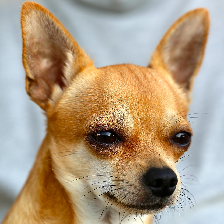

In [ ]:
img_path = 'chihuahua.jpg' # 要辨識的影像檔名
img = image.load_img(img_path, target_size=(224, 224)) # 讀入圖片

img

In [ ]:
# 圖片轉換成神經網路的輸入格式
x = image.img_to_array(img)  
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

x

array([[[[ 78.061    ,  70.221    ,  61.32     ],
         [ 80.061    ,  71.221    ,  59.32     ],
         [ 80.061    ,  71.221    ,  59.32     ],
         ...,
         [117.061    ,  93.221    ,  78.32     ],
         [118.061    ,  94.221    ,  79.32     ],
         [119.061    ,  95.221    ,  80.32     ]],

        [[ 79.061    ,  70.221    ,  58.32     ],
         [ 80.061    ,  68.221    ,  57.32     ],
         [ 80.061    ,  69.221    ,  56.32     ],
         ...,
         [117.061    ,  94.221    ,  77.32     ],
         [117.061    ,  94.221    ,  77.32     ],
         [119.061    ,  96.221    ,  79.32     ]],

        [[ 79.061    ,  67.221    ,  56.32     ],
         [ 82.061    ,  69.221    ,  56.32     ],
         [ 81.061    ,  68.221    ,  55.32     ],
         ...,
         [117.061    ,  93.221    ,  78.32     ],
         [118.061    ,  94.221    ,  79.32     ],
         [117.061    ,  93.221    ,  78.32     ]],

        ...,

        [[ 46.060997 ,  31.221    ,  1

In [ ]:
# 預測，取得特徵
features = model.predict(x)

1/1 [==============================] - 1s 737ms/step


In [ ]:
# 取得前三個最可能的類別及機率
top_k = 3
results = decode_predictions(features, top=top_k)[0]
for result in results:
  print('類別:', result[1])
  print('機率:', result[2])
  print()

類別: Chihuahua
機率: 0.9417821

類別: toy_terrier
機率: 0.056123838

類別: miniature_pinscher
機率: 0.0016340064

